In [1]:
import networkx
import matplotlib.pyplot as plt

In [2]:
def ring_network(N):
    g = networkx.Graph()
    for i in range(N):
        g.add_edge(i, (i+1)%N)
        g.add_edge(i, (i+2)%N)
    return g

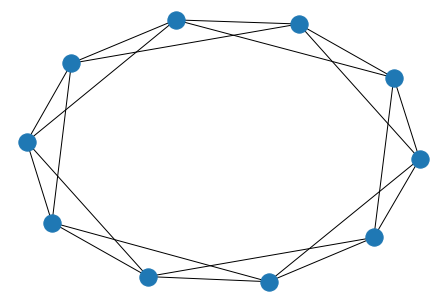

In [3]:
networkx.draw(ring_network(10))

# Problem:

Given a ring network of $N$ nodes (first & second neighbor connections), add $N/2$ "shortcut edges" at random. What is the average clustering coefficient as $N$ goes to infinity?

# Theoretical solution

In the original ring (without shortcuts) each node has degree 4, and is part of 3 triangles. Thus, the clustering coefficient is: $$C = \frac{3}{\frac{4\cdot3}{2}} = 0.5$$

Adding in the shortcut edges, although will create some additional triangles, the number of these additional triangles is neglibible as $N \to \infty$, thus the result will approach $0.5$
                                                                                                                                                

In [11]:
networkx.average_clustering(ring_network(100))

0.5

# Computational solution


In [8]:
import random

def add_shortcuts(g):
    nodes = list(g.nodes())
    while g.number_of_edges() < (g.number_of_nodes()*2.5):
        node_a = random.choice(nodes)
        node_b = random.choice(nodes)
        if (node_a != node_b) and not g.has_edge(node_a, node_b):
            g.add_edge(node_a, node_b)
    return g

In [9]:
N_list = [10, 20, 50, 100, 200, 500, 1000, 2000]
values = [networkx.average_clustering(add_shortcuts(ring_network(N))) for N in N_list]

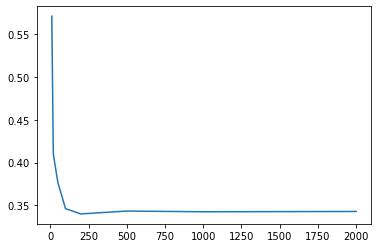

In [10]:
plt.plot(N_list, values)

Reading from the plot, our computational result: 0.35 +- 0.02
    
This significatly differs from the theoretical result

In [16]:
sum(networkx.triangles(ring_network(10)).values())/3.0

10.0

In [18]:
for i in range(10):
    print(sum(networkx.triangles(add_shortcuts(ring_network(10))).values())/3.0)

18.0
22.0
19.0
18.0
17.0
16.0
22.0
18.0
18.0
15.0


In [19]:
for i in range(10):   
    print(sum(networkx.triangles(ring_network(100)).values())/3.0, sum(networkx.triangles(add_shortcuts(ring_network(100))).values())/3.0)

100.0 104.0
100.0 102.0
100.0 105.0
100.0 108.0
100.0 108.0
100.0 100.0
100.0 102.0
100.0 108.0
100.0 108.0
100.0 105.0


In [20]:
for i in range(10):   
    print(sum(networkx.triangles(ring_network(1000)).values())/3.0, sum(networkx.triangles(add_shortcuts(ring_network(1000))).values())/3.0)

1000.0 1000.0
1000.0 1005.0
1000.0 1004.0
1000.0 1002.0
1000.0 1006.0
1000.0 1004.0
1000.0 1001.0
1000.0 1005.0
1000.0 1007.0
1000.0 1006.0


In [24]:
for i in range(10):   
    print( (sum(networkx.triangles(add_shortcuts(ring_network(500))).values())/3.0) / (sum(networkx.triangles(ring_network(500)).values())/3.0))

1.006
1.014
1.012
1.004
1.016
1.006
1.02
1.006
1.014
1.004


In [25]:
for i in range(10):   
    print( (sum(networkx.triangles(add_shortcuts(ring_network(50))).values())/3.0) / (sum(networkx.triangles(ring_network(50)).values())/3.0))

1.08
1.12
1.08
1.12
1.1
1.04
1.06
1.16
1.1
1.12


(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

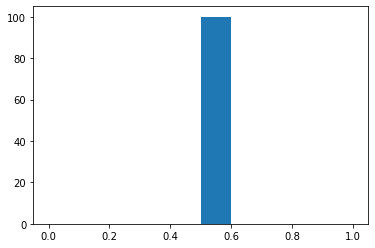

In [30]:
plt.hist(networkx.clustering(ring_network(100)).values())

(array([ 6.,  0., 23.,  0., 34.,  0.,  0.,  0.,  0., 37.]),
 array([0.10714286, 0.14642857, 0.18571429, 0.225     , 0.26428571,
        0.30357143, 0.34285714, 0.38214286, 0.42142857, 0.46071429,
        0.5       ]),
 <BarContainer object of 10 artists>)

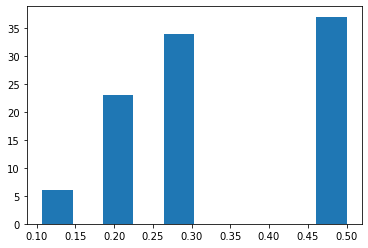

In [31]:
plt.hist(networkx.clustering(add_shortcuts(ring_network(100))).values())

In [32]:
for i in range(10):   
    print( (sum(networkx.triangles(add_shortcuts(ring_network(100))).values())/3.0) / (sum(networkx.triangles(ring_network(100)).values())/3.0))

1.05
1.05
1.07
1.06
1.06
1.13
1.05
1.05
1.04
1.11


(array([83.,  0., 13.,  0.,  0.,  2.,  0.,  1.,  0.,  1.]),
 array([3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8, 6.2, 6.6, 7. ]),
 <BarContainer object of 10 artists>)

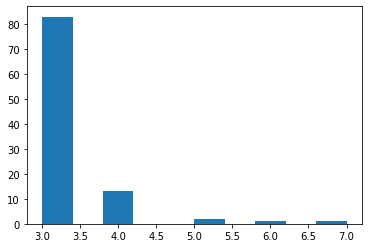

In [33]:
plt.hist(networkx.triangles(add_shortcuts(ring_network(100))).values())

(array([38.,  0., 34.,  0., 22.,  0.,  3.,  0.,  2.,  1.]),
 array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. ]),
 <BarContainer object of 10 artists>)

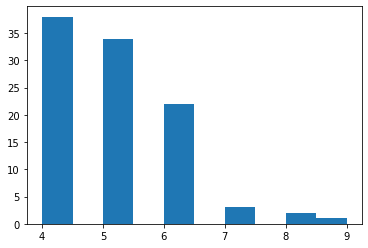

In [38]:
plt.hist(dict(add_shortcuts(ring_network(100)).degree()).values())

(array([977.,   0.,   0.,   0.,   0.,  19.,   0.,   0.,   0.,   4.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

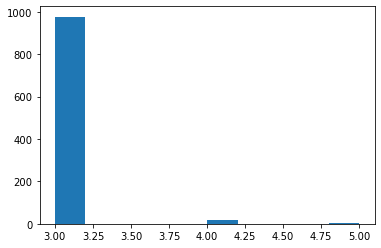

In [40]:
plt.hist(networkx.triangles(add_shortcuts(ring_network(1000))).values())

(array([357.,   0., 383.,   0., 183.,   0.,  61.,   0.,  12.,   4.]),
 array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. ]),
 <BarContainer object of 10 artists>)

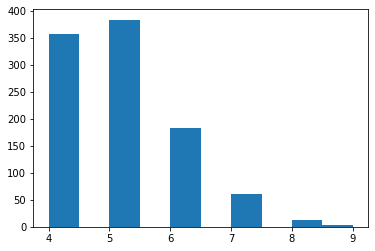

In [41]:
plt.hist(dict(add_shortcuts(ring_network(1000)).degree()).values())

(array([1816., 1895.,    0.,  893.,    0.,  292.,   81.,    0.,   19.,
           4.]),
 array([ 4. ,  4.6,  5.2,  5.8,  6.4,  7. ,  7.6,  8.2,  8.8,  9.4, 10. ]),
 <BarContainer object of 10 artists>)

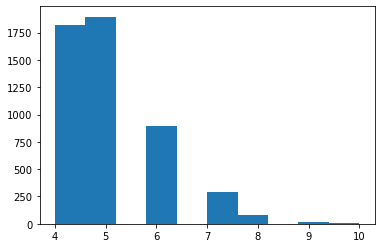

In [42]:
plt.hist(dict(add_shortcuts(ring_network(5000)).degree()).values())

In [49]:
random.seed(42)
for i in range(10):
    print(random.random())

0.6394267984578837
0.025010755222666936
0.27502931836911926
0.22321073814882275
0.7364712141640124
0.6766994874229113
0.8921795677048454
0.08693883262941615
0.4219218196852704
0.029797219438070344


In [50]:
random.seed(42)
for i in range(10):
    print(random.random())

0.6394267984578837
0.025010755222666936
0.27502931836911926
0.22321073814882275
0.7364712141640124
0.6766994874229113
0.8921795677048454
0.08693883262941615
0.4219218196852704
0.029797219438070344


In [53]:
random.getstate()

(3,
 (2468570525,
  44967195,
  2667364560,
  2449893699,
  1652692239,
  766678126,
  273175325,
  1513475390,
  2407048223,
  2326550691,
  3055735416,
  2487780036,
  476975371,
  81632736,
  1598452444,
  3338301038,
  3898475993,
  1749546629,
  4084786842,
  949316744,
  2086501466,
  4175211502,
  3792229788,
  1718685282,
  2499662139,
  4222931543,
  3063257123,
  910424605,
  1400804300,
  830603822,
  3216023045,
  2756927633,
  3684278863,
  3724968901,
  332416530,
  52016619,
  2751489098,
  1877715228,
  1932382287,
  3281876149,
  3597828351,
  330629843,
  142483984,
  1379430288,
  83784318,
  2266112133,
  1736800492,
  3746267091,
  2610492607,
  2079803227,
  3463890091,
  615297649,
  2445958069,
  138783768,
  741209753,
  3721915402,
  2027708325,
  4005341927,
  2093884772,
  119215273,
  551524651,
  3739622759,
  3782730527,
  404717681,
  321534867,
  1286801508,
  1706479953,
  2882329788,
  1029701930,
  2373551443,
  3296995744,
  468358352,
  746091816,


In [55]:
random.seed((1,2,3,4))

In [56]:
hash((1,2,3,4))

590899387183067792

In [57]:

clustering_values = []
for i in all_possibilities:
    clustering_values.append(networkx.average_clustering(add_shortcuts(ring_network(50))))
sum(clustering_values) / len(clustering_values)


0.35619047619047634

In [ ]:
average(mathematical_quantity(some_networks()))

In [69]:
values_50 = [networkx.average_clustering(add_shortcuts(ring_network(50))) for i in range(200)]

In [70]:
values_10 = [networkx.average_clustering(add_shortcuts(ring_network(10))) for i in range(200)]

In [71]:
values_100 = [networkx.average_clustering(add_shortcuts(ring_network(100))) for i in range(200)]

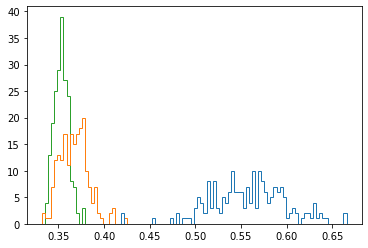

In [72]:
_ = plt.hist([values_10, values_50, values_100 ], histtype='step', bins=100)

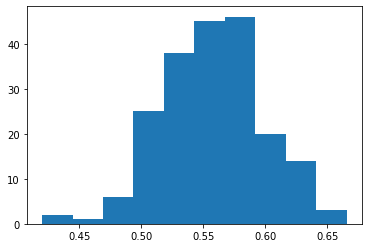

In [73]:
_ = plt.hist(values_10)

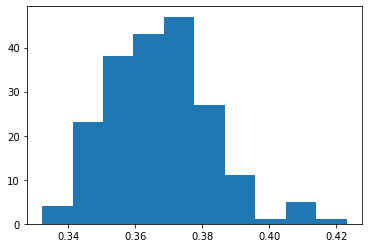

In [74]:
_ = plt.hist(values_50)

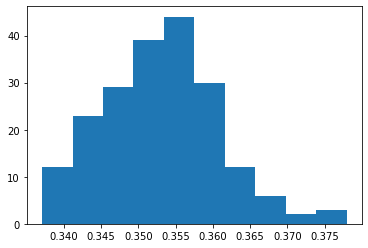

In [75]:
_ = plt.hist(values_100)

In [76]:
networkx.average_clustering(add_shortcuts(ring_network(50)))

0.35609523809523813

In [77]:
sum(values_50)/len(values_50)

0.3672625036075037